## CAT AND DOG CLASSIFICATION 

Loading data and Installing Torch 

In [2]:
# Loading Data
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2019-01-01 16:47:45--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  79.7MB/s    in 7.5s    

2019-01-01 16:47:53 (74.2 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [3]:
!ls

Cat_Dog_data.zip  sample_data


In [4]:
# Unzipping the required folder
!unzip Cat_Dog_data.zip

Archive:  Cat_Dog_data.zip
   creating: Cat_Dog_data/
  inflating: Cat_Dog_data/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/Cat_Dog_data/
  inflating: __MACOSX/Cat_Dog_data/._.DS_Store  
   creating: Cat_Dog_data/test/
   creating: Cat_Dog_data/test/cat/
  inflating: Cat_Dog_data/test/cat/cat.7660.jpg  
   creating: __MACOSX/Cat_Dog_data/test/
   creating: __MACOSX/Cat_Dog_data/test/cat/
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.7660.jpg  
  inflating: Cat_Dog_data/test/cat/cat.1211.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.1211.jpg  
  inflating: Cat_Dog_data/test/cat/cat.1563.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.1563.jpg  
  inflating: Cat_Dog_data/test/cat/cat.1205.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.1205.jpg  
  inflating: Cat_Dog_data/test/cat/cat.7884.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.7884.jpg  
  inflating: Cat_Dog_data/test/cat/cat.6542.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/c

In [6]:
# Installing pytorch and torchvision
!pip3 install torch torchvision

    100% |████████████████████████████████| 591.8MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60fbe000 @  0x7f70a5bab2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
  Using cached https://files.pythonhosted.org/packages/ca/0d/f00b2885711e08bd71242ebe7b96561e6f6d01fdb4b9dcf4d37e2e13c5e1/torchvision-0.2.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 2.0MB 4.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [21]:
# Installing Pillow 
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

    100% |████████████████████████████████| 5.7MB 7.3MB/s 
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


In [0]:
# Defining helper functions to display images
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')



In [0]:
# Importing Required Packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms



##  Loading Image Data
- **ImageFolder from torchvision** to create a dataset by pplying required transformations.
- dataset = datasets.ImageFolder('path/to/data', transform=transform)
- **Transforms** - transform images before training such as **transforms.Resize() transforms.CenterCrop() transforms.RandomResizedCrop()**
- convert the images to PyTorch tensors with **transforms.ToTensor()**
- combine these transforms into a pipeline with **transforms.Compose()**

### Data Loaders 
- The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels.

- Example

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
Here dataloader is a generator. To get data out of it, you need to loop through it or convert it to an iterator and call next().

#### Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

#### Get one batch
images, labels = next(iter(dataloader))

In [0]:
transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224),
                               transforms.ToTensor()])

dataset = datasets.ImageFolder('Cat_Dog_data/train', transform = transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


## Data Augmentation
-A common strategy for training neural networks is to introduce randomness in the input data itself. 
- For example, you can randomly rotate, mirror, scale, and/or crop your images during training. This will help your network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

- To randomly rotate, scale and crop, then flip your images you would define your transforms like this:

-  train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
                                                            
                                                            
- You'll also typically want to normalize images with **transforms.Normalize**. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

input[channel] = (input[channel] - mean[channel]) / std[channel]

Subtracting mean centers the data around zero and dividing by std squishes the values to be between -1 and 1. Normalizing helps keep the network weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

In [0]:
# CREATING TRAIN AND TEST LOADER WITH DIFFERENT TRANSFORMATION
data_dir = 'Cat_Dog_data'

#  Define transforms for the training data and testing data

# NO DATA AUGUMENTATION IN TEST SET - because validation needs to be performed on same input like images and not augumented
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

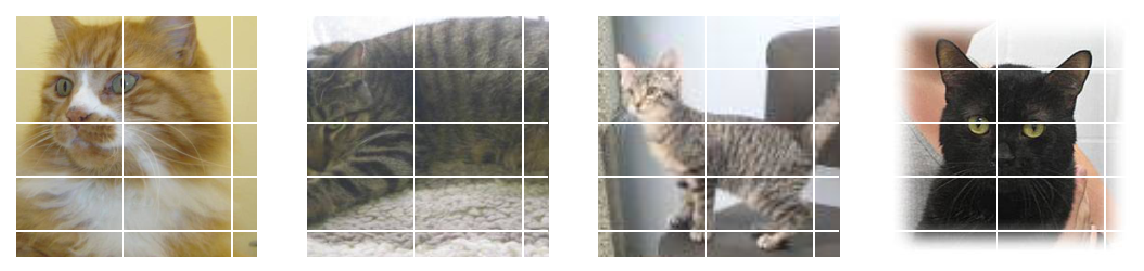

In [25]:

# Displaying Images in test loader
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

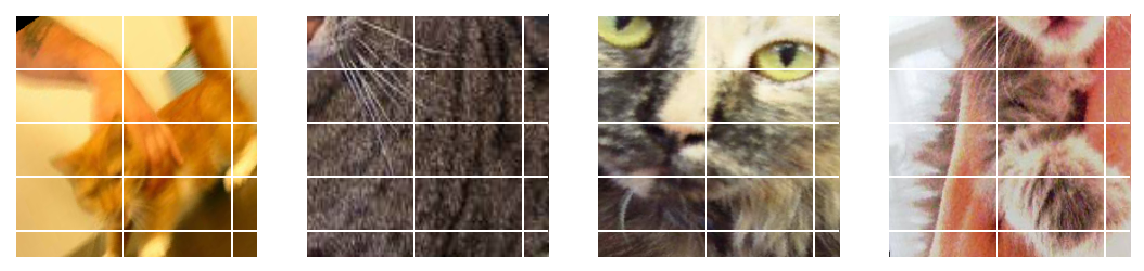

In [26]:

# Displaying Images in train loader
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

## TRANSFER LEARNING

-  Fully-connected network wont work, no matter how deep. These images have three color channels and at a higher resolution ( 28x28 images are tiny).
- ** Use networks trained on [ImageNet](https://pytorch.org/docs/0.3.0/torchvision/models.html) available from torchvision.**

- ImageNet is a massive dataset with over 1 million labeled images in 1000 categories.
- **
Most of the pretrained models require the input to be 224x224 images. Also, we'll need to match the normalization used when the models were trained. Each color channel was normalized separately, the means are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225].**

-  This model is built out of two main parts, the **features** and the **classifier**.
- **The features part is a stack of convolutional layers and overall works as a feature detector that can be fed into a classifier.**
- **The classifier part is a single fully-connected layer (classifier): Linear(in_features=1024, out_features=1000).** This layer was trained on the ImageNet dataset, so it won't work for our specific problem. That means we need to replace the classifier, but the features will work perfectly on their own. In general, I think about pre-trained networks as amazingly good feature detectors that can be used as the input for simple feed-forward classifiers.

- **CPU AND GPU**  PyTorch, along with pretty much every other deep learning framework, uses CUDA to efficiently compute the forward and backwards passes on the GPU.

- In PyTorch, you move your model parameters and other tensors to the GPU memory using model.to('cuda'). You can move them back from the GPU with model.to('cpu') which you'll commonly do when you need to operate on the network output outside of PyTorch.

- RETURN TRUE IF GPU IS AVAILABLE **torch.cuda.is_available()**






In [0]:
# NORMALIZATION OVER TRAINING AND TESTING DATA
# CREATING TRAIN AND TEST LOADER WITH DIFFERENT TRANSFORMATION
data_dir = 'Cat_Dog_data'

#  Define transforms for the training data and testing data

# NO DATA AUGUMENTATION IN TEST SET - because validation needs to be performed on same input like images and not augumented
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor() ,
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                     [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor() ,
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                    [0.229, 0.224, 0.225])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [32]:
# Load Pretrained models
import torchvision.models as models
model = models.densenet121(pretrained = True)
print(model)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 45904043.88it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
# Idea - keep feature part static and change only classifier
# Freeze Feature Parameters
for param in model.parameters():
  param.requires_grad = False
  
# Replace classifier with new classifier

from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
    ('fc1' , nn.Linear(1024, 500)),
    ('relu', nn.ReLU()),
    ('fc2' , nn.Linear(500, 2)),
    ('output', nn.LogSoftmax(dim =1))
]))

# Attach to pretrained model 
model.classifier = classifier
                    

In [37]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


Epoch 1/1.. Train loss: 1.005.. Test loss: 0.319.. Test accuracy: 0.919
Epoch 1/1.. Train loss: 0.462.. Test loss: 0.244.. Test accuracy: 0.924
Epoch 1/1.. Train loss: 0.385.. Test loss: 0.160.. Test accuracy: 0.942
Epoch 1/1.. Train loss: 0.307.. Test loss: 0.102.. Test accuracy: 0.975
Epoch 1/1.. Train loss: 0.268.. Test loss: 0.173.. Test accuracy: 0.929
Epoch 1/1.. Train loss: 0.401.. Test loss: 0.153.. Test accuracy: 0.932
Epoch 1/1.. Train loss: 0.231.. Test loss: 0.115.. Test accuracy: 0.961
Epoch 1/1.. Train loss: 0.318.. Test loss: 0.077.. Test accuracy: 0.978
Epoch 1/1.. Train loss: 0.213.. Test loss: 0.080.. Test accuracy: 0.976
Epoch 1/1.. Train loss: 0.156.. Test loss: 0.067.. Test accuracy: 0.980
Epoch 1/1.. Train loss: 0.161.. Test loss: 0.064.. Test accuracy: 0.979
Epoch 1/1.. Train loss: 0.141.. Test loss: 0.055.. Test accuracy: 0.980
Epoch 1/1.. Train loss: 0.238.. Test loss: 0.083.. Test accuracy: 0.968
Epoch 1/1.. Train loss: 0.116.. Test loss: 0.061.. Test accuracy